In [24]:
#import all header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#import the dataset
df = pd.read_csv("D:\coders cave\data1.csv")
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14852\2337886502.py:2: DtypeWarning: Columns (6,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\coders cave\data1.csv")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ransom
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0


In [54]:
#data cleaning
import pandas as pd

# Loop through each column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Save the DataFrame with imputed values
df.to_csv("D:\coders cave\imputed_dataset.csv", index=False)


In [55]:
df1=pd.read_csv("D:\coders cave\imputed_dataset.csv")

In [56]:
print(df1.describe())

            eventid          iyear         imonth           iday  \
count  1.703500e+05  170350.000000  170350.000000  170350.000000   
mean   2.001775e+11    2001.709997       6.474365      15.466845   
std    1.314443e+09      13.144146       3.392364       8.817929   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.990050e+11    1990.000000       4.000000       8.000000   
50%    2.007120e+11    2007.000000       6.000000      15.000000   
75%    2.014020e+11    2014.000000       9.000000      23.000000   
max    2.017010e+11    2016.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  170350.000000  170350.000000  170350.000000  170350.000000   
mean        0.043634     132.526669       7.091441      23.399774   
std         0.204279     112.848161       2.949206      18.588369   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      75.000000       

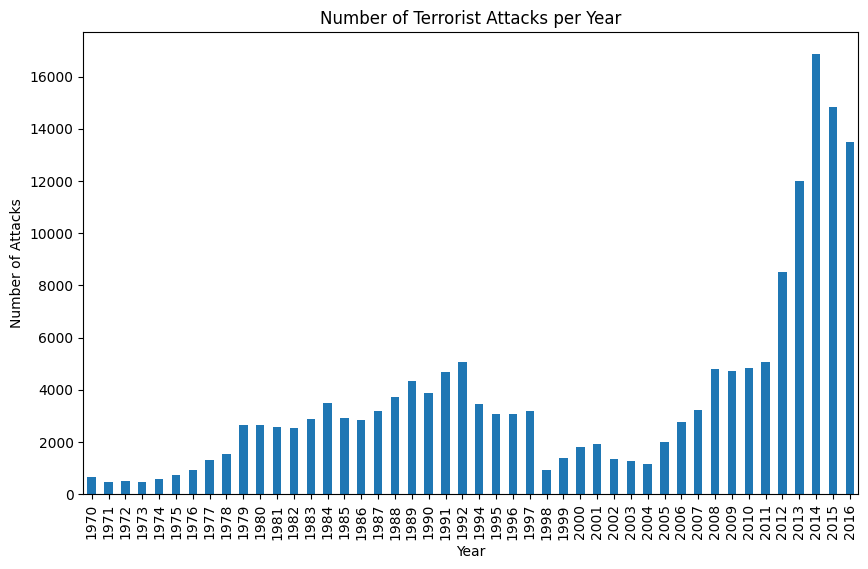

In [57]:
plt.figure(figsize=(10, 6))
df['iyear'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Terrorist Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

Terrorist attack was maximum in year 2014

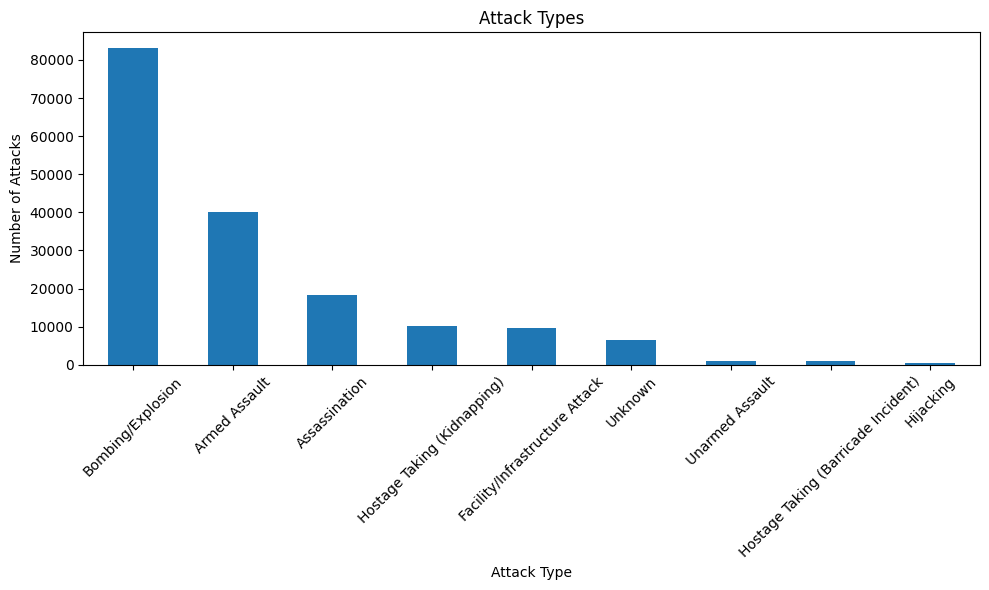

In [58]:

# Plot a bar chart of attack types
plt.figure(figsize=(10, 6))
df['attacktype1_txt'].value_counts().plot(kind='bar')
plt.title('Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The most common and highest no of attacks were Bombing/Explosion

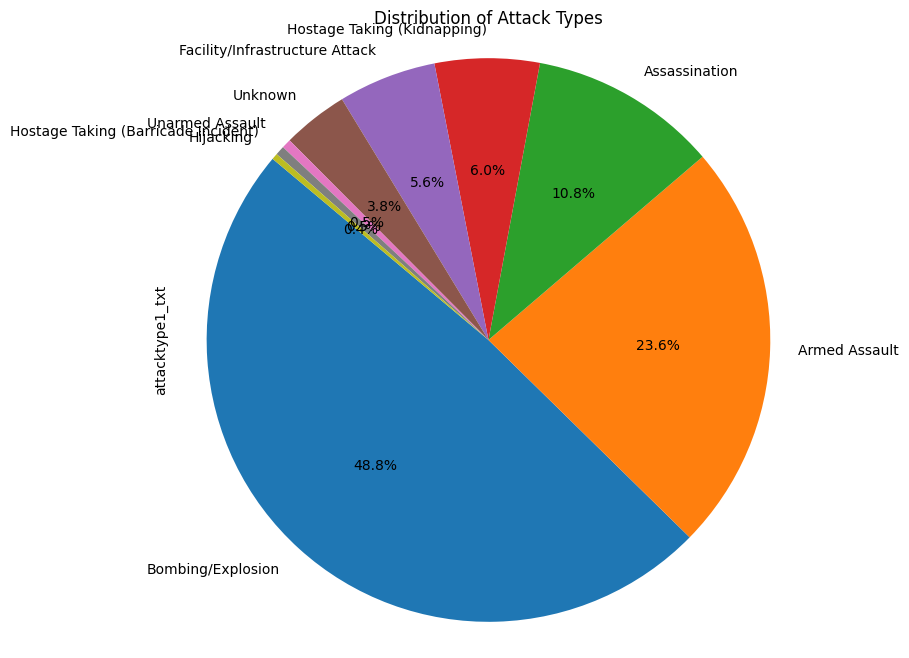

In [59]:
# Plot a pie chart of attack types
plt.figure(figsize=(8, 8))
df['attacktype1_txt'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attack Types')
plt.axis('equal')
plt.show()

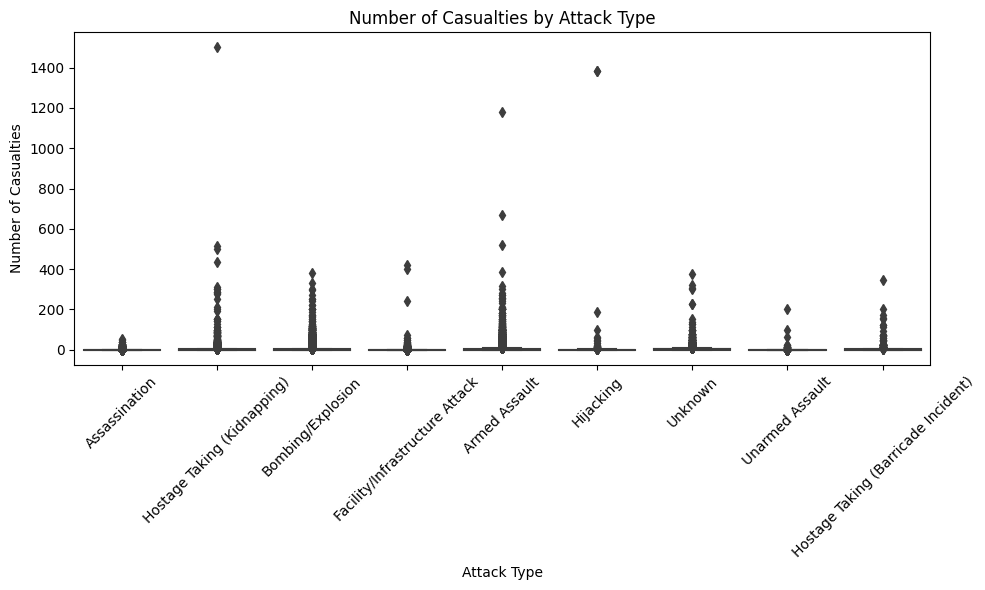

In [60]:
# Plot a box plot of number of casualties by attack type
plt.figure(figsize=(10, 6))
sns.boxplot(x='attacktype1_txt', y='nkill', data=df)
plt.title('Number of Casualties by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the boxplot we can coclude that most casualities or deaths were happened in case of Hostage Taking(Kidnapping)

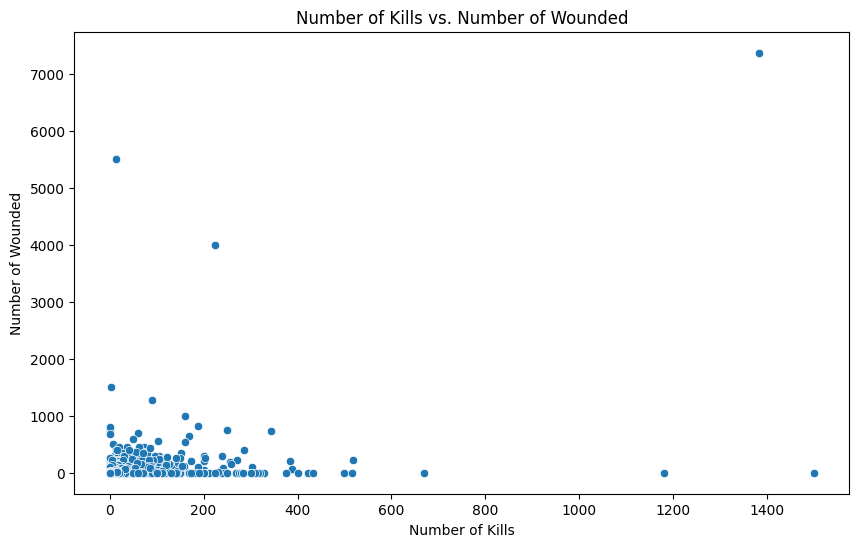

In [61]:
# Plot a scatter plot of number of kills vs. number of wounded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nkill', y='nwound', data=df)
plt.title('Number of Kills vs. Number of Wounded')
plt.xlabel('Number of Kills')
plt.ylabel('Number of Wounded')
plt.show()

We can find slightly negative correlation for number of kills vs no of wounded as we can see if one paramter killing increases the wounded decreases

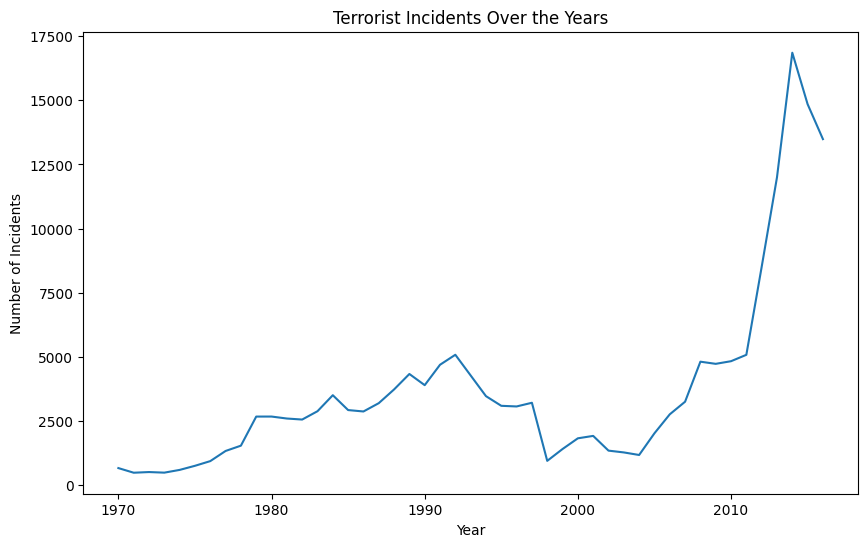

In [62]:
# Plot a line plot of terrorist incidents over the years
plt.figure(figsize=(10, 6))
df.groupby('iyear').size().plot(kind='line')
plt.title('Terrorist Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

In [ ]:
From Line plot we can infer that as year 2000 there is steady increase in terrorist incident

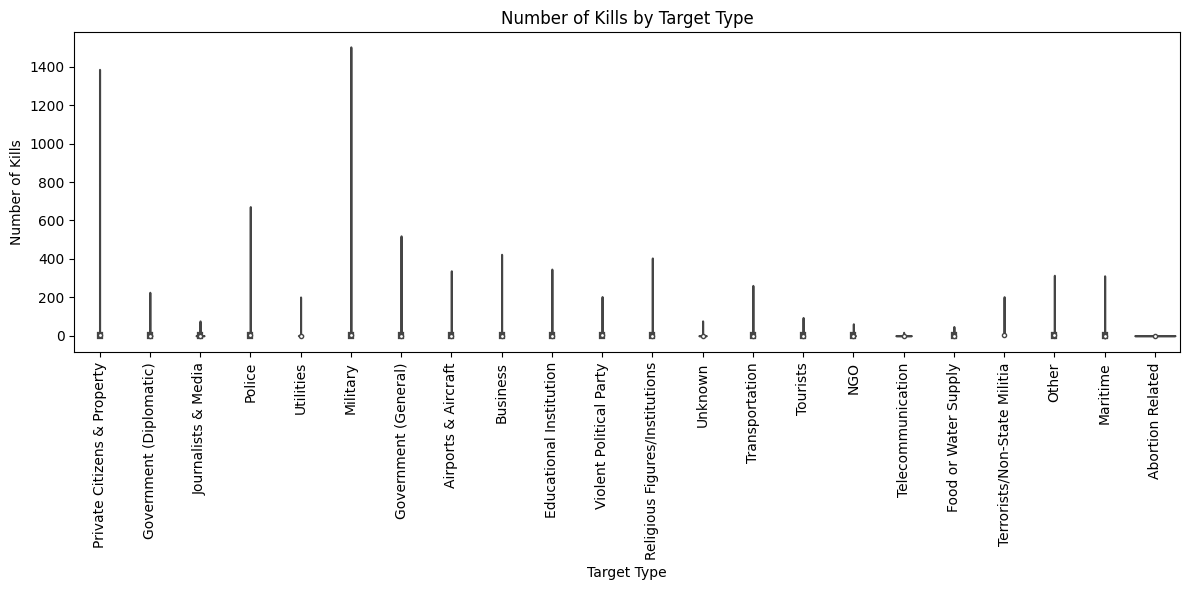

In [63]:
# Plot a violin plot of number of kills by target type
plt.figure(figsize=(12, 6))
sns.violinplot(x='targtype1_txt', y='nkill', data=df)
plt.title('Number of Kills by Target Type')
plt.xlabel('Target Type')
plt.ylabel('Number of Kills')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

from violin plot , we can infer that the terrorist killing group mostly belong to MILITARY and Private citizens

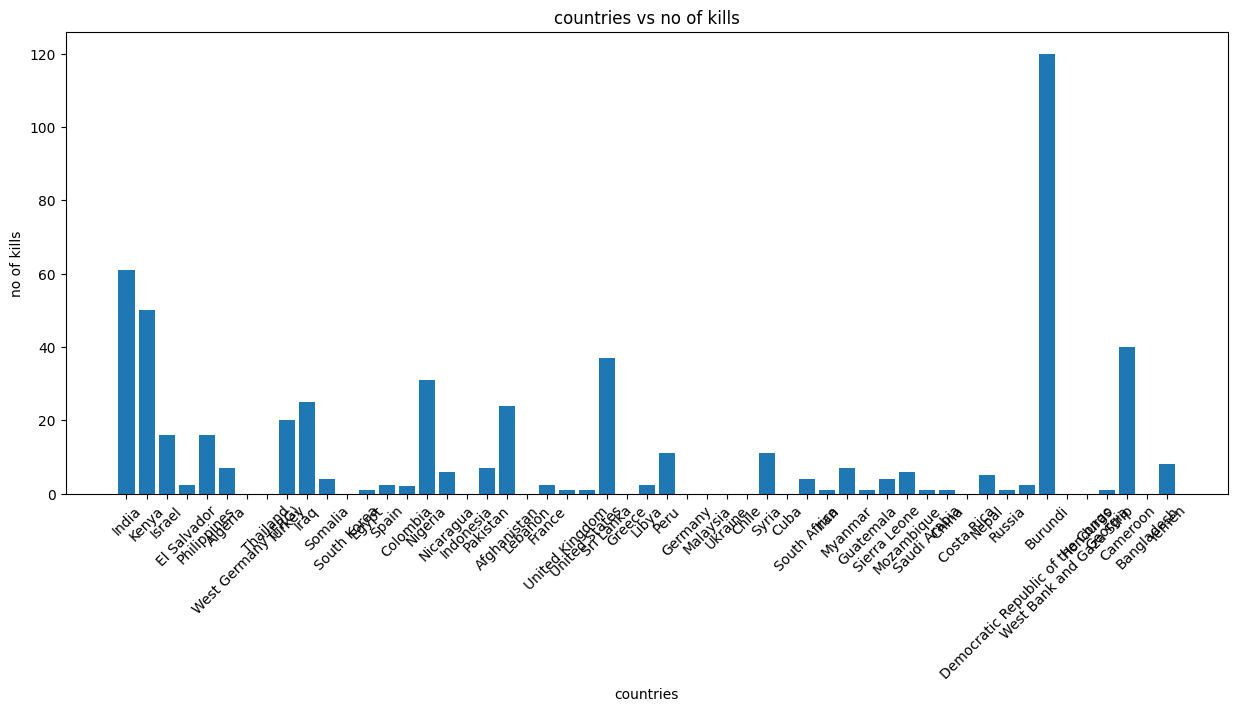

In [64]:
# Bar Chart
plt.figure(figsize=(15, 6))
sample_size = 250  # Adjust this value to the desired sample size
sampled_df = df.sample(n=sample_size, random_state=42)  # You can change the random_state if needed
plt.bar(sampled_df['country_txt'], sampled_df['nkill'])
plt.title('countries vs no of kills')
plt.xlabel('countries')
plt.ylabel('no of kills')
plt.xticks(rotation=45)
plt.show()

From bar plot we conclude that the terrorist attack was more in country BURUNDI followed by INDIA

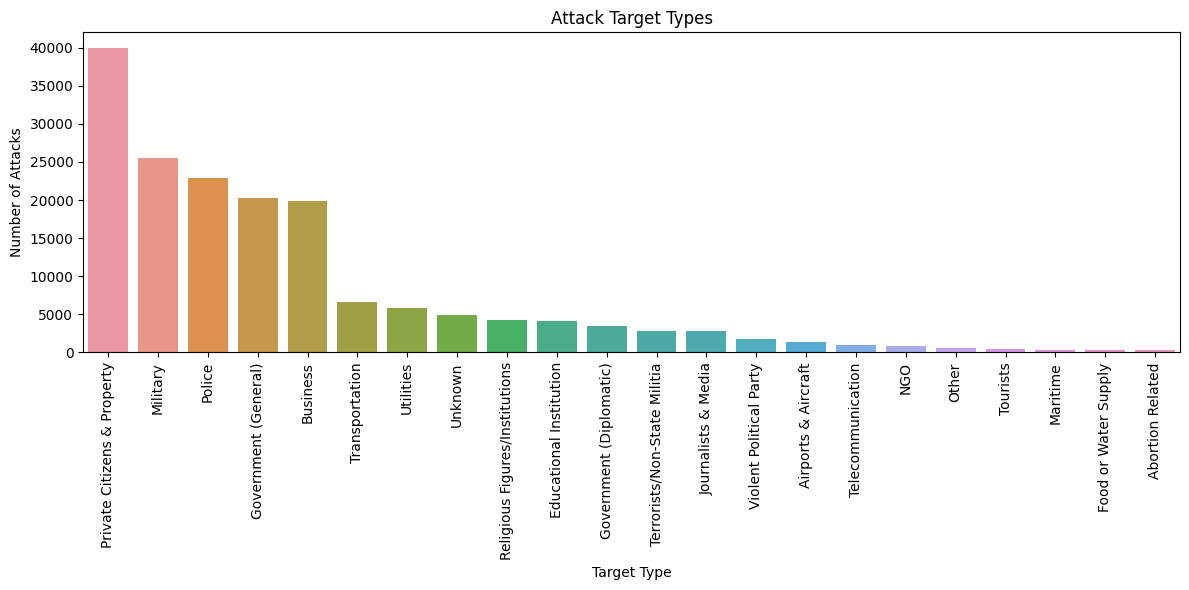

In [73]:
# Plot a bar chart of attack target types
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='targtype1_txt', order=df['targtype1_txt'].value_counts().index)
plt.title('Attack Target Types')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


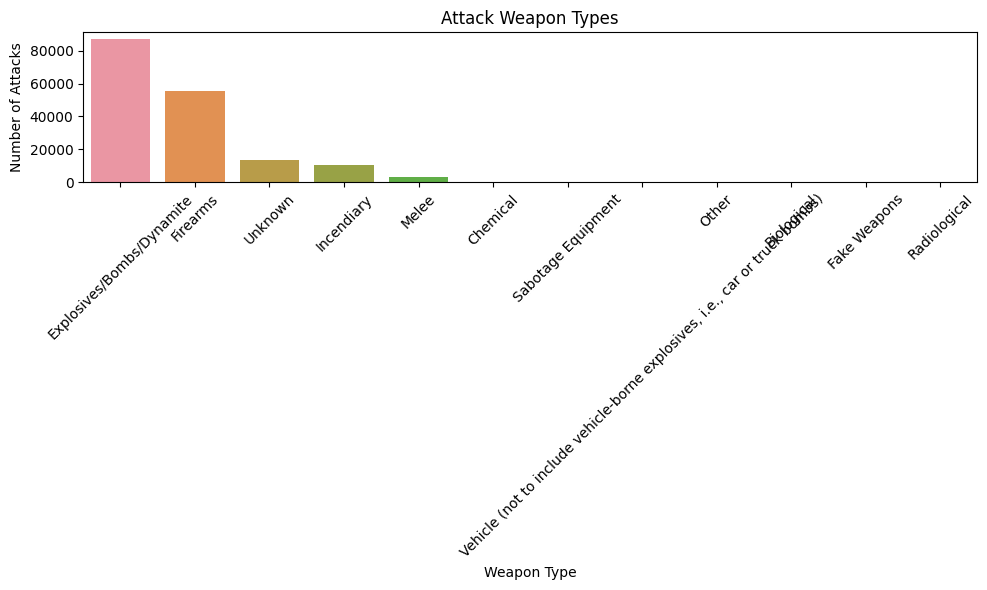

In [74]:
# Plot a bar chart of attack weapon types
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='weaptype1_txt', order=df['weaptype1_txt'].value_counts().index)
plt.title('Attack Weapon Types')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14852\2148823966.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

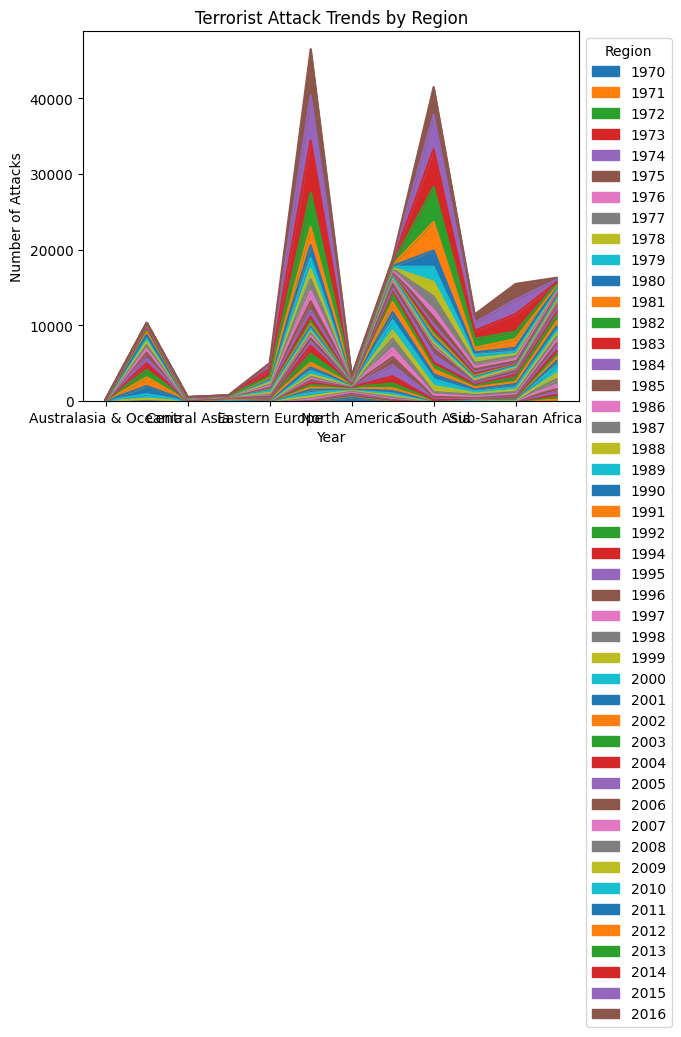

In [76]:
# Plot a stacked area chart of attack trends by region
plt.figure(figsize=(12, 8))
region_year = df.groupby(['region_txt', 'iyear']).size().unstack()
region_year.plot(kind='area', stacked=True)
plt.title('Terrorist Attack Trends by Region')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


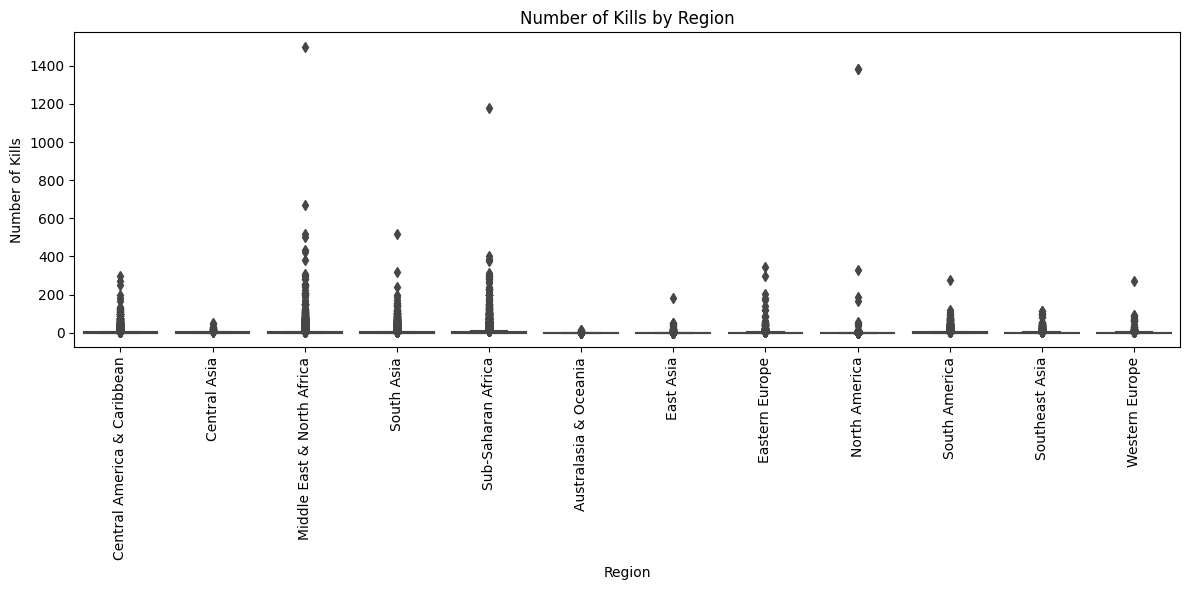

In [78]:
# Plot a box plot of the number of kills by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region_txt', y='nkill', order=df.groupby('region_txt')['nkill'].median().sort_values(ascending=False).index)
plt.title('Number of Kills by Region')
plt.xlabel('Region')
plt.ylabel('Number of Kills')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

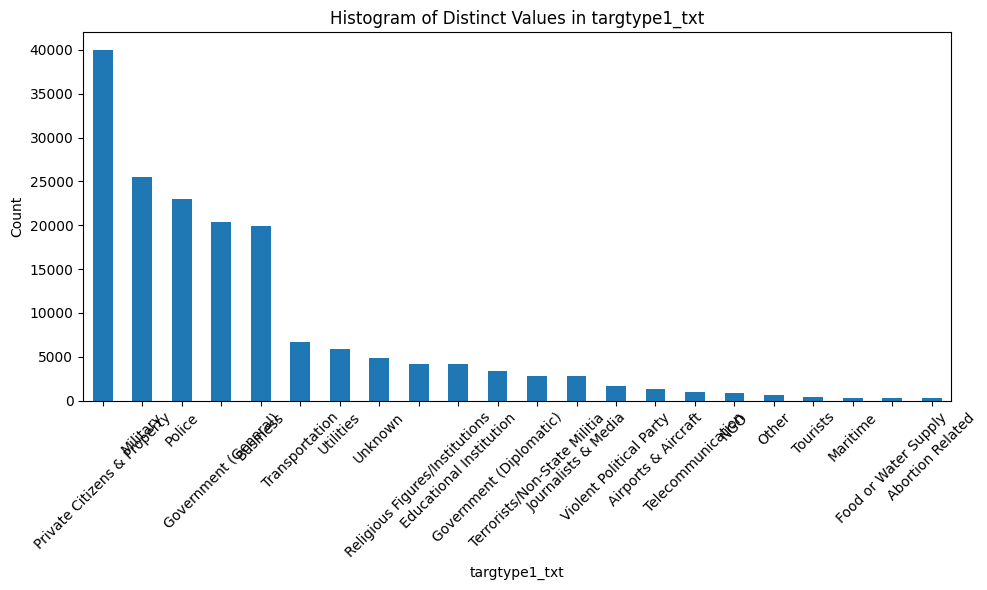

In [85]:
# Histogram for targettype of people who were attacked
column_name = 'targtype1_txt'

# Count distinct values in the column
distinct_counts = df[column_name].value_counts()

# Plot histogram of distinct value counts
plt.figure(figsize=(10, 6))
distinct_counts.plot(kind='bar')
plt.title(f'Histogram of Distinct Values in {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

